In [94]:
#import libraries
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping

#import sklearn
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [95]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1)


In [96]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

y_test.shape

(10000,)

In [97]:
# Label	Description
# 0	airplane
# 1	automobile
# 2	bird
# 3	cat
# 4	deer
# 5	dog
# 6	frog
# 7	horse
# 8	ship
# 9	truck

In [98]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [99]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [100]:
labels[8]

'ship'

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
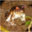

In [101]:
x_train[0]

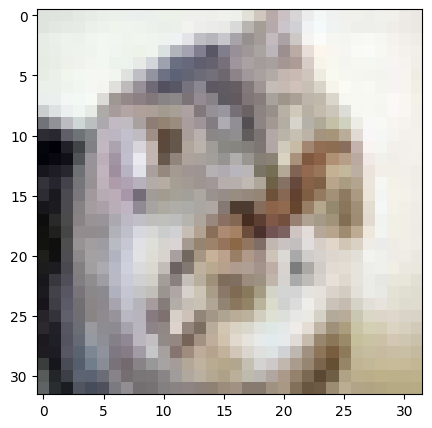

Image of cat


In [102]:
random_img_index = random.randint(0,len(x_train))
plt.figure(figsize=(10,5))
plt.imshow(x_train[random_img_index])
plt.show()
print(f'Image of {labels[y_train[random_img_index]]}')

In [103]:
#function to generate random img

def random_img_gen(x,y):
  random_img_index = random.randint(0,len(x))
  plt.figure(figsize=(10,5))
  plt.imshow(x[random_img_index])
  plt.show()
  print(f'Image of {labels[y[random_img_index]]}')

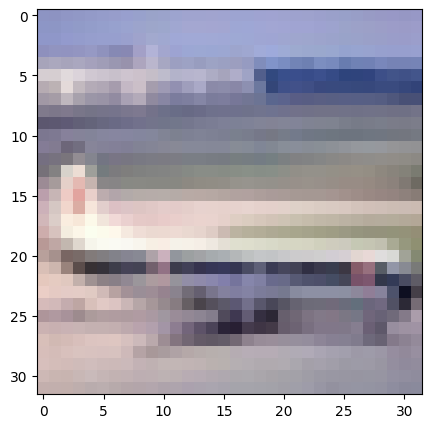

Image of airplane


In [104]:
random_img_gen(x_train,y_train)

In [105]:
#scalling img range from 0-255 to 0-1

x_train = x_train/255.0
x_test = x_test/255.0

x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

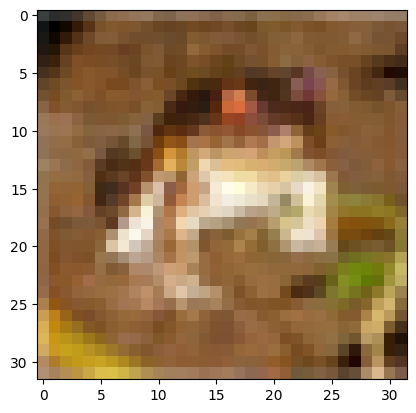

In [106]:
plt.imshow(x_train[0])
plt.show()

In [107]:
#Cnn architecture

In [108]:
def model_build():
  model = Sequential([
      Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)),
      MaxPooling2D((2,2)),

      Conv2D(64,(3,3),activation='relu'),
      MaxPooling2D((2,2)),

      Flatten(),

      Dense(128, activation='relu'), #input layer
      Dense(64, activation='relu'), #Hidden layer
      Dense(32, activation='relu'), #Hidden layer
      Dense(10,activation='softmax') #output layer
  ])
  #compile model
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model


In [109]:
model = model_build()

In [112]:
#train model on train data
es = EarlyStopping(monitor='val_loss',mode='auto',verbose=1, patience=3)
model.fit(x_train,y_train, validation_split=0.2, epochs = 20, callbacks=[es])

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3368 - loss: 1.7913 - val_accuracy: 0.5601 - val_loss: 1.2536
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5746 - loss: 1.1910 - val_accuracy: 0.6144 - val_loss: 1.1063
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6466 - loss: 0.9948 - val_accuracy: 0.6503 - val_loss: 0.9897
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6956 - loss: 0.8666 - val_accuracy: 0.6518 - val_loss: 1.0134
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7337 - loss: 0.7621 - val_accuracy: 0.6843 - val_loss: 0.9180
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7642 - loss: 0.6745 - val_accuracy: 0.6900 - val_loss: 0.9164
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7961 - loss: 0.5875 - val_accuracy: 0.6959 - val_loss: 0.9227
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8176 - loss: 0.5200

In [113]:
#mode evalution
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6905 - loss: 0.9860


[0.9886355400085449, 0.692300021648407]

In [114]:
#model predict
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [115]:
y_pred[0]

array([1.3585684e-03, 9.3585660e-04, 3.2835070e-03, 2.4100490e-01,
       2.6361138e-02, 7.1549243e-01, 2.3488309e-03, 8.6128078e-03,
       1.4138392e-04, 4.6052260e-04], dtype=float32)

In [116]:
int(y_test[0])

3

In [117]:
int(np.argmax(y_pred[0]))

5

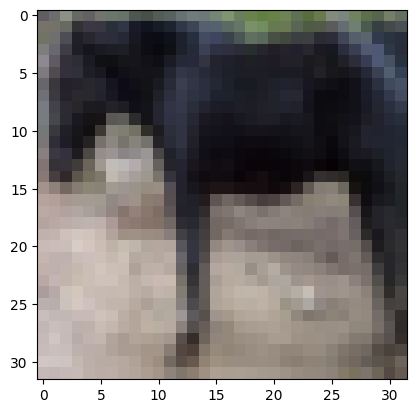

True class label is: horse
Predicted label is: horse


In [127]:
#check predictited images

rand_index = random.randint(0,len(x_test))
plt.imshow(x_test[rand_index])
plt.show()

print('True class label is:',labels[y_test[rand_index]])
print('Predicted label is:',labels[int(np.argmax(y_pred[rand_index]))])


              precision    recall  f1-score   support

    airplane       0.67      0.81      0.73      1000
  automobile       0.83      0.78      0.81      1000
        bird       0.57      0.60      0.58      1000
         cat       0.56      0.46      0.50      1000
        deer       0.63      0.63      0.63      1000
         dog       0.58      0.67      0.62      1000
        frog       0.86      0.67      0.76      1000
       horse       0.70      0.79      0.74      1000
        ship       0.83      0.78      0.81      1000
       truck       0.76      0.74      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



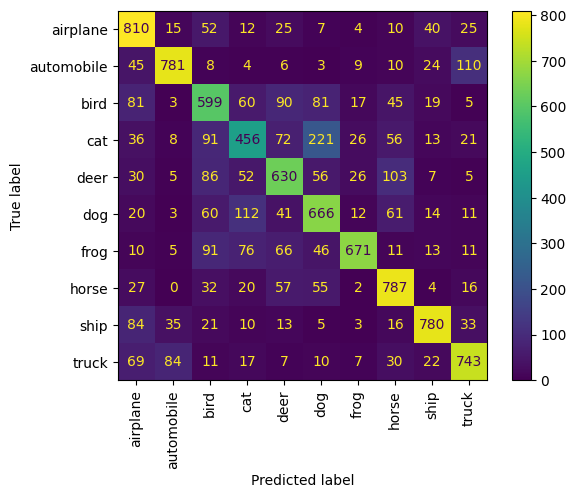

In [123]:
#metrics validation
y_pred_ = [int(np.argmax(i)) for i in y_pred]
# y_pred_
print(classification_report(y_test,y_pred_,target_names=labels))
cm = ConfusionMatrixDisplay.from_predictions(y_test,y_pred_,display_labels=labels,xticks_rotation='vertical')